GO analysis of WT AZ gene expression etc

In [ ]:
library(here)
library(Matrix)
library(tidyverse)
library(Seurat)
library(ggpointdensity)
library(scales)
#library(DropletUtils)
#library(reticulate)
library(repr)
#library(DoubletFinder)
library(future)
library(RColorBrewer)
#library(edgeR)
#library(limma)
#library(svglite)
#library(PCAtools)
options(future.globals.maxSize = 100000 * 1024^2)

proto_genes=read.csv("../data/bulk_data/protoplasting.csv")
proto_list=as.character(proto_genes[abs(proto_genes$logFC) > 1,]$genes)
bulk_data = read.csv("/home/robotmessenger810/data/buckets/single_cell_bucket_3_4_21/IWT_RNA_seq/scRNA_flowers/outputs/bulk_edger_10_16_20.csv")

annotations = read.csv("R_functions/gene_descriptions.csv", header = F)
colnames(annotations) = c("gene_id", "description")
annotations$gene_id = substr(annotations$gene_id, 1, 9)

bp = read.csv("../data/shiny_go_analysis/figure_3/bp.csv")
cc = read.csv("../data/shiny_go_analysis/figure_3/cc.csv")
mf = read.csv("../data/shiny_go_analysis/figure_3/mf.csv")

In [2]:
seu_intd_wt_mut = readRDS(file = "../data/intd_seu_objects/4_12_22_WT_mut.rds")

resolution = .75
set.seed(42)
DefaultAssay(seu_intd_wt_mut) <- "integrated"
options(repr.plot.width=12, repr.plot.height=12)
# Run the standard workflow for visualization and clustering
#all_intd_sct <- ScaleData(all_intd_sct, verbose = FALSE)
seu_intd_wt_mut <- RunPCA(seu_intd_wt_mut, npcs = 100, verbose = FALSE, approx = FALSE)
#From RunPCA doc: Features to compute PCA on. If features=NULL, PCA will be run using the variable features for the Assay. 
#Note that the features must be present in the scaled data. Any requested features that are not scaled or have 0 variance 
#will be dropped, and the PCA will be run using the remaining features.

#previously run 20 PCs as of 2/14/22
seu_intd_wt_mut <- FindNeighbors(seu_intd_wt_mut, dims = 1:20, verbose = FALSE)
seu_intd_wt_mut <- FindClusters(seu_intd_wt_mut, resolution = resolution, algorithm = 3, verbose = FALSE)
seu_intd_wt_mut <- RunUMAP(seu_intd_wt_mut, reduction = "pca", dims = 1:20, verbose = FALSE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


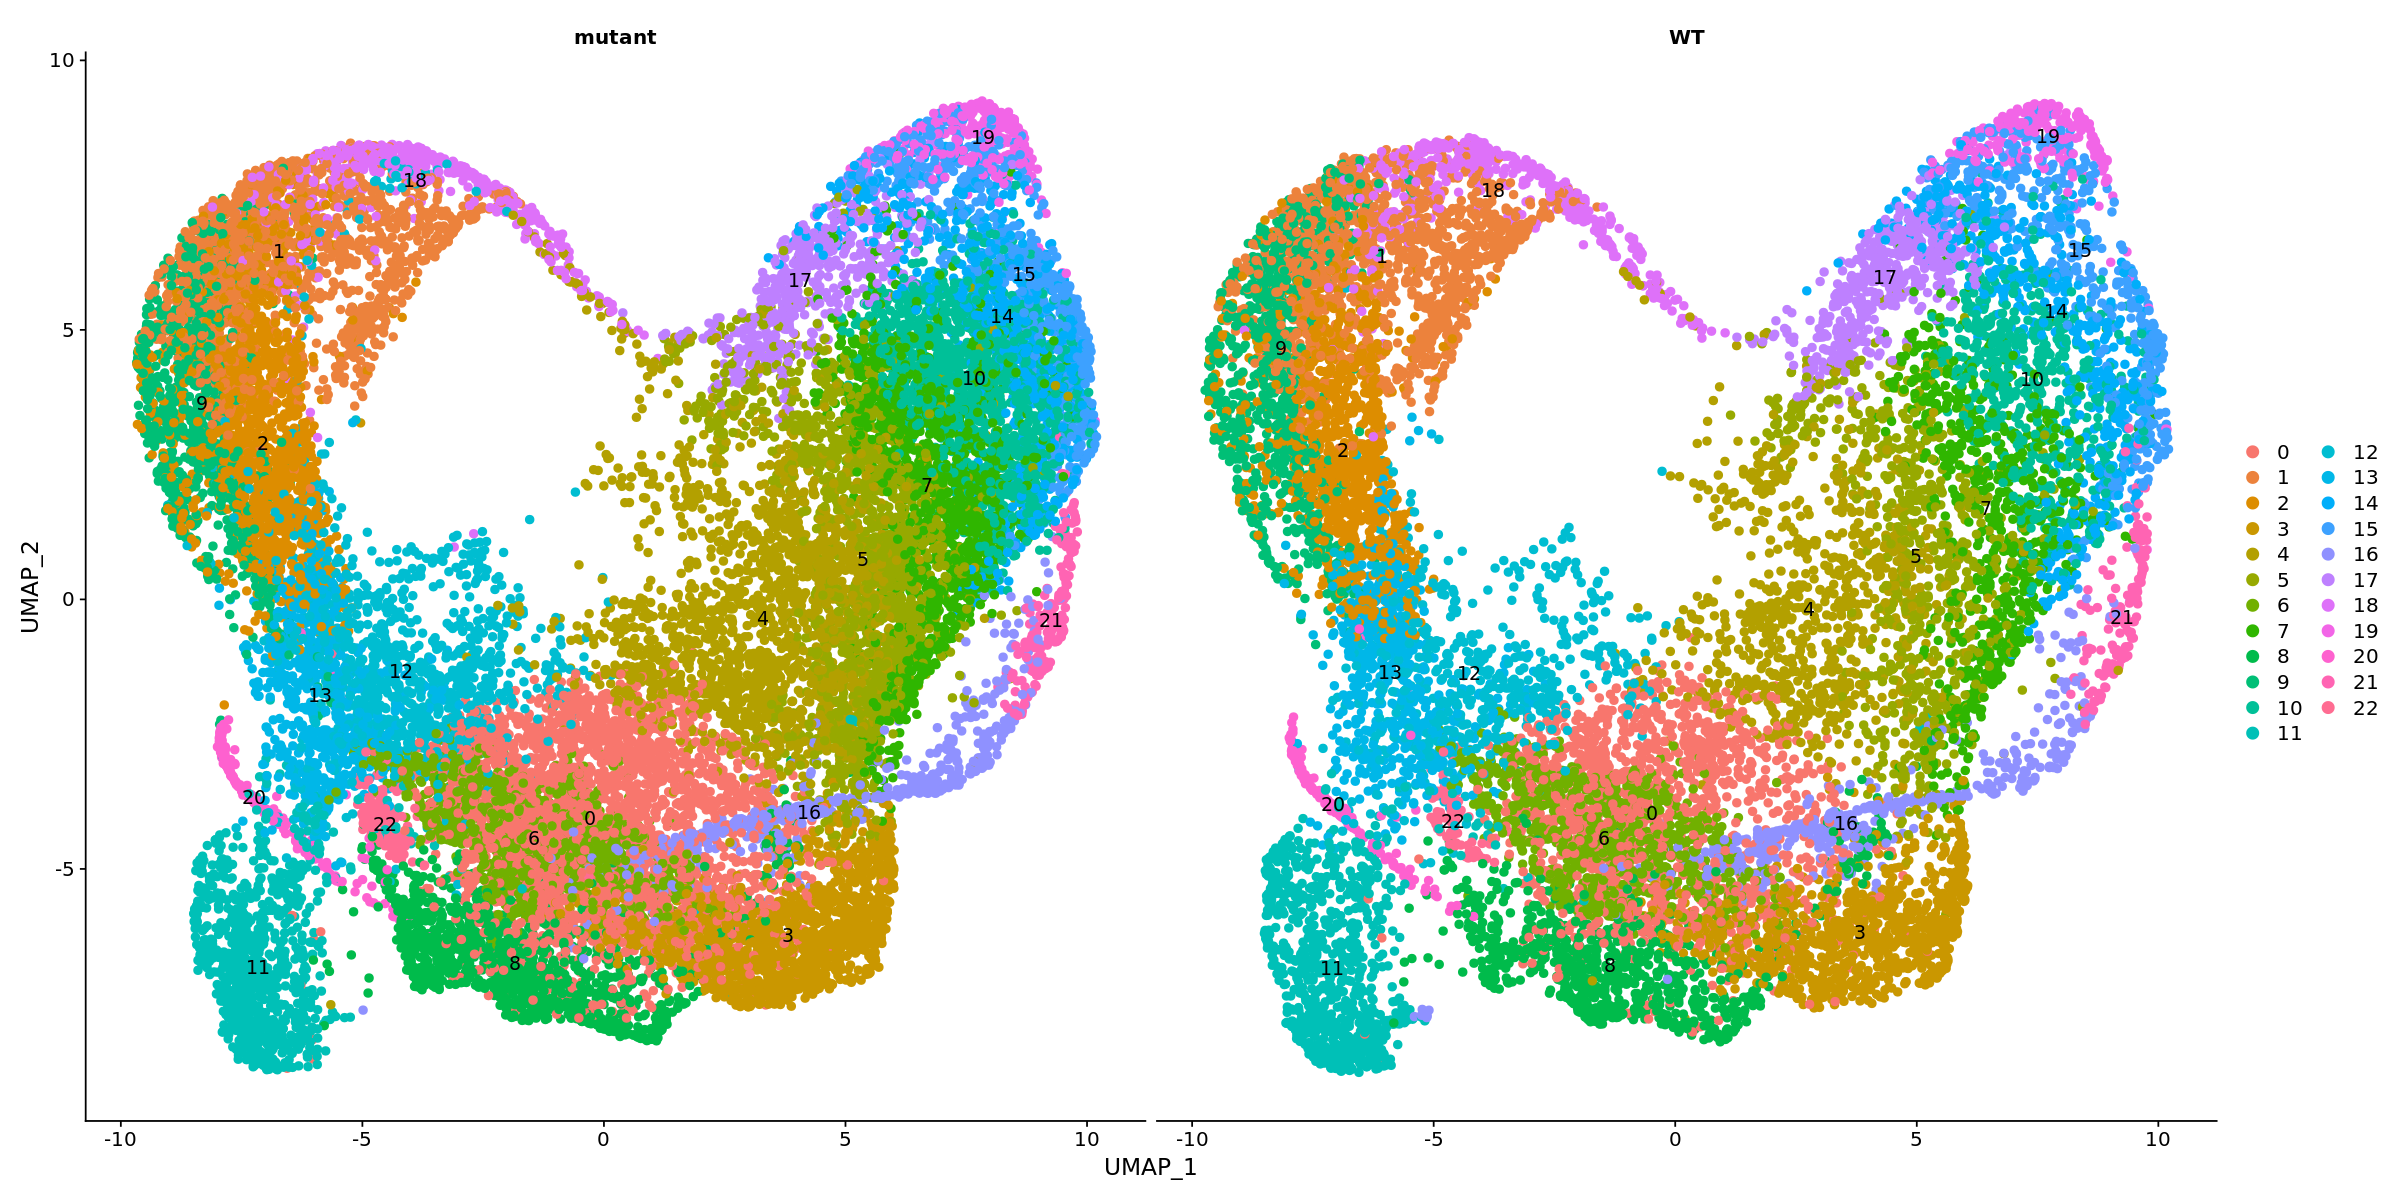

In [8]:
options(repr.plot.width= 20, repr.plot.height=10)
DimPlot(seu_intd_wt_mut, reduction = "umap", label = TRUE, pt.size = 2, split.by = "geno")#, cols = c("0" = "red"))

In [6]:
seu_intd_wt = subset(seu_intd_wt_mut, subset = geno == "WT")

In [7]:
#findmarkers
cluster_AZ_all = FindAllMarkers(seu_intd_wt, max.cells.per.ident = 1000)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22



In [9]:
saveRDS(cluster_AZ_all, file = paste("../data/markers/", "AZ_markers_WT_ALL_res_75_April_19_22", ".rds", sep=""))

In [10]:
#write AZ specific genes as well as all genes with high enough expression to be included in the analysis (ie the universe of genes for gene set testing)
write.csv(cluster_AZ_all[cluster_AZ_all$cluster == 11,], file = paste("../data/for_figures/", "AZ_spec_genes_universe_WT_res_75_4_19_22", ".csv", sep=""), row.names = FALSE)
write.csv(unique(cluster_AZ_all$gene), file = paste("../data/for_figures/", "WT_universe_spec_genes_WT_res_75_4_19_22", ".csv", sep=""), row.names = FALSE)

In [5]:
#genes from go analysis

#cell wall genes
genes1 = unlist(strsplit(as.character(bp[grepl("Pectin catabolic process", bp$Pathway),]$Genes), " "))
genes2 = unlist(strsplit(as.character(bp[grepl("Pectin metabolic process", bp$Pathway),]$Genes), " "))
genes3 = unlist(strsplit(as.character(bp[grepl("Polysaccharide catabolic process", bp$Pathway),]$Genes), " "))

genes_cwr = union(union(genes1, genes2), genes3)


#phenylpropanoid (ligning and suberin)
genes1 = unlist(strsplit(as.character(bp[grepl("Phenylpropanoid", bp$Pathway),]$Genes), " "))

genes_phen = unique(genes1)

#hydrogen peroxide
genes1 = unlist(strsplit(as.character(bp[grepl("Hydrogen peroxide catabolic process", bp$Pathway),]$Genes), " "))

genes_hpc = genes1


In [6]:
genes_cwr 
genes_phen
genes_hpc

[1] "AT1G53830" "AT2G41850" "AT2G47550" "AT3G07970" "AT3G24670" "AT3G27400"
 [7] "AT4G24780" "AT4G28490" "AT2G18230" "AT2G41800" "AT1G68560" "AT1G71380"
[13] "AT3G12500" "AT4G23560" "AT5G04885"

[1] "AT1G22640" "AT1G79180" "AT2G37040" "AT3G44540" "AT3G44550" "AT3G44560"
 [7] "AT4G23690" "AT4G34050" "AT5G05340" "AT5G22500" "AT5G48930"

[1] "AT1G05260" "AT1G44970" "AT3G21770" "AT3G28200" "AT3G49110" "AT4G37530"
[7] "AT5G05340" "AT5G06720" "AT5G58390"

In [7]:
intersect(genes_cwr, genes_phen)
intersect(genes_hpc, genes_phen)
intersect(genes_cwr, genes_hpc)

character(0)

[1] "AT5G05340"

character(0)

In [5]:
resolution = 1.25
set.seed(42)
DefaultAssay(seu_intd_wt) <- "integrated"
options(repr.plot.width=12, repr.plot.height=12)
# Run the standard workflow for visualization and clustering
#seu_intd_wt <- ScaleData(seu_intd_wt, verbose = FALSE)
seu_intd_wt <- RunPCA(seu_intd_wt, npcs = 100, verbose = FALSE, approx = FALSE)
#From RunPCA doc: Features to compute PCA on. If features=NULL, PCA will be run using the variable features for the Assay. 
#Note that the features must be present in the scaled data. Any requested features that are not scaled or have 0 variance 
#will be dropped, and the PCA will be run using the remaining features.

#previously run 20 PCs as of 2/14/22
seu_intd_wt <- FindNeighbors(seu_intd_wt, dims = 1:20, verbose = FALSE)
seu_intd_wt <- FindClusters(seu_intd_wt, resolution = resolution, algorithm = 3, verbose = FALSE)
seu_intd_wt <- RunUMAP(seu_intd_wt, reduction = "pca", dims = 1:20, verbose = FALSE)

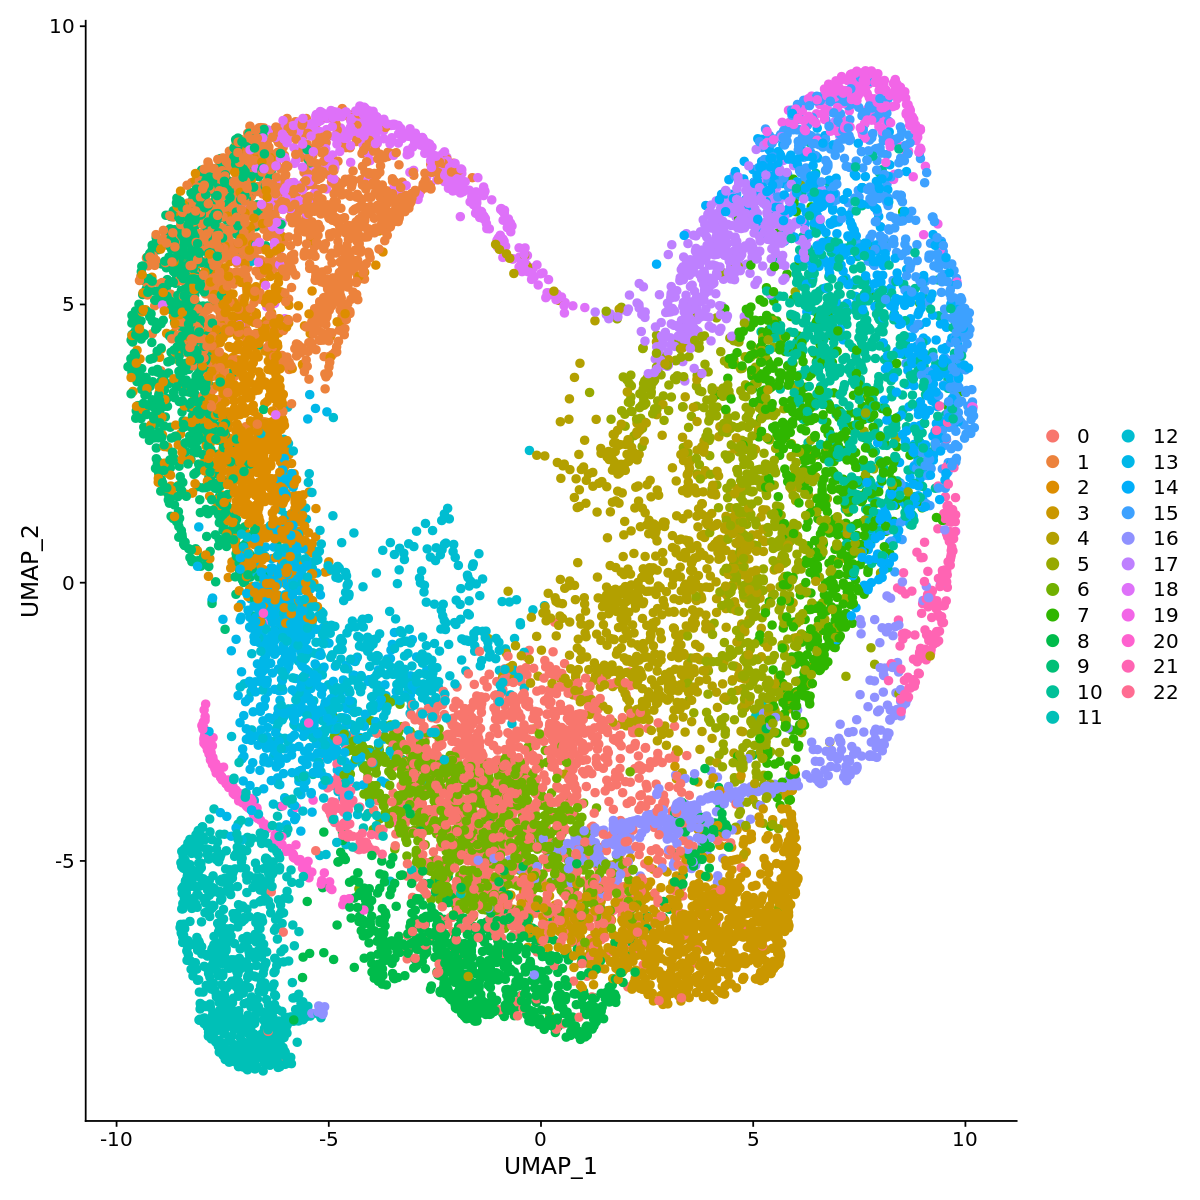

In [7]:
options(repr.plot.width= 10, repr.plot.height=10)
DimPlot(seu_intd_wt, reduction = "umap", label = FALSE, pt.size = 2)#, cols = c("0" = "red"))

In [ ]:
DefaultAssay(seu_intd_wt) <- "RNA"
seu_intd_wt = NormalizeData(seu_intd_wt,  normalization.method = "CLR",verbose = FALSE)

In [7]:
#cwr
DefaultAssay(seu_intd_wt) <- "RNA"
options(repr.plot.width=8, repr.plot.height=8)

for (g in genes_cwr) {
    plot = FeaturePlot(seu_intd_wt, features = g,  pt.size = 4, min = .5, order = TRUE)#, split.by = "experiment")# + scale_colour_gradient(low = "gray94", high = "red", space = "Lab", na.value = "grey50", guide = "colourbar",aesthetics = "colour")
    plot = plot + labs(title = substr(annotations[annotations$gene_id == g,2],1,70))   
    ggsave(file=paste0("/home/robotmessenger810/sc_analysis/data/for_figures/gene_plots/figure_3_pngs/cwr/raw_normalized/",g, ".png"), plot=plot, width=10, height=10)
}

DefaultAssay(seu_intd_wt) <- "SCT"

for (g in genes_cwr) {
    plot = FeaturePlot(seu_intd_wt, features = g,  pt.size = 4, min = .5, order = TRUE)#, split.by = "experiment")# + scale_colour_gradient(low = "gray94", high = "red", space = "Lab", na.value = "grey50", guide = "colourbar",aesthetics = "colour")
    plot = plot + labs(title = substr(annotations[annotations$gene_id == g,2],1,70))   
    ggsave(file=paste0("/home/robotmessenger810/sc_analysis/data/for_figures/gene_plots/figure_3_pngs/cwr/sct/",g, ".png"), plot=plot, width=10, height=10)
}

In [11]:
#phenylpropanoid
DefaultAssay(seu_intd_wt) <- "RNA"
options(repr.plot.width=8, repr.plot.height=8)

for (g in genes_phen) {
    plot = FeaturePlot(seu_intd_wt, features = g,  pt.size = 4, min = .5, order = TRUE)#, split.by = "experiment")# + scale_colour_gradient(low = "gray94", high = "red", space = "Lab", na.value = "grey50", guide = "colourbar",aesthetics = "colour")
    plot = plot + labs(title = substr(annotations[annotations$gene_id == g,2],1,70))   
    ggsave(file=paste0("/home/robotmessenger810/sc_analysis/data/for_figures/gene_plots/figure_3_pngs/phen/raw_normalized/",g, ".png"), plot=plot, width=10, height=10)
}

DefaultAssay(seu_intd_wt) <- "SCT"

for (g in genes_phen) {
    plot = FeaturePlot(seu_intd_wt, features = g,  pt.size = 4, min = .5, order = TRUE)#, split.by = "experiment")# + scale_colour_gradient(low = "gray94", high = "red", space = "Lab", na.value = "grey50", guide = "colourbar",aesthetics = "colour")
    plot = plot + labs(title = substr(annotations[annotations$gene_id == g,2],1,70))   
    ggsave(file=paste0("/home/robotmessenger810/sc_analysis/data/for_figures/gene_plots/figure_3_pngs/phen/sct/",g, ".png"), plot=plot, width=10, height=10)
}

In [12]:
#peroxidases
DefaultAssay(seu_intd_wt) <- "RNA"
options(repr.plot.width=8, repr.plot.height=8)

for (g in genes_hpc) {
    plot = FeaturePlot(seu_intd_wt, features = g,  pt.size = 4, min = .5, order = TRUE)#, split.by = "experiment")# + scale_colour_gradient(low = "gray94", high = "red", space = "Lab", na.value = "grey50", guide = "colourbar",aesthetics = "colour")
    plot = plot + labs(title = substr(annotations[annotations$gene_id == g,2],1,70))    
    ggsave(file=paste0("/home/robotmessenger810/sc_analysis/data/for_figures/gene_plots/figure_3_pngs/hpc/raw_normalized/",g, ".png"), plot=plot, width=10, height=10)
}

DefaultAssay(seu_intd_wt) <- "SCT"

for (g in genes_hpc) {
    plot = FeaturePlot(seu_intd_wt, features = g,  pt.size = 4, min = .5, order = TRUE)#, split.by = "experiment")# + scale_colour_gradient(low = "gray94", high = "red", space = "Lab", na.value = "grey50", guide = "colourbar",aesthetics = "colour")
    plot = plot + labs(title = substr(annotations[annotations$gene_id == g,2],1,70))   
    ggsave(file=paste0("/home/robotmessenger810/sc_analysis/data/for_figures/gene_plots/figure_3_pngs/hpc/sct/",g, ".png"), plot=plot, width=10, height=10)
}

In [10]:
# #others
# DefaultAssay(seu_intd_wt) <- "RNA"
# options(repr.plot.width=8, repr.plot.height=8)

# for (g in genes_phen) {
#     plot = FeaturePlot(seu_intd_wt, features = g,  pt.size = 4, min = .5, order = TRUE)#, split.by = "experiment")# + scale_colour_gradient(low = "gray94", high = "red", space = "Lab", na.value = "grey50", guide = "colourbar",aesthetics = "colour")
#     plot = plot + labs(title = substr(annotations[annotations$gene_id == g,2],1,70))     
#     ggsave(file=paste0("/home/robotmessenger810/sc_analysis/data/for_figures/gene_plots/figure_3_pngs/other/raw_normalized/",g, ".png"), plot=plot, width=10, height=10)
# }

# DefaultAssay(seu_intd_wt) <- "SCT"

# for (g in genes_cwr) {
#     plot = FeaturePlot(seu_intd_wt, features = g,  pt.size = 4, min = .5, order = TRUE)#, split.by = "experiment")# + scale_colour_gradient(low = "gray94", high = "red", space = "Lab", na.value = "grey50", guide = "colourbar",aesthetics = "colour")
#     plot = plot + labs(title = substr(annotations[annotations$gene_id == g,2],1,70))   
#     ggsave(file=paste0("/home/robotmessenger810/sc_analysis/data/for_figures/gene_plots/figure_3_pngs/other/sct/",g, ".png"), plot=plot, width=10, height=10)
# }

In [8]:
#read in data for cluster assignment
#protoplast
proto_genes=read.csv("../data/bulk_data/protoplasting.csv")
proto_list=as.character(proto_genes[abs(proto_genes$logFC) > 4,]$genes)

#kwak data
kwak_ptpms=read.csv("../data/counts/kwak_ptpms.csv")
rownames(kwak_ptpms) = kwak_ptpms$X
kwak_ptpms[,c(1,2,3)] =NULL
colnames(kwak_ptpms) = "counts"

#HAE_YFP_and_KE sorted
YFP_KE = read.csv("../data/counts/sorted_bulk_edger_1_20_21.csv")
YFP_av = data.frame(YFP_KE[,8])
rownames(YFP_av) = YFP_KE[,1]               


In [15]:
DefaultAssay(seu_intd_wt) = "RNA"

In [17]:
#get pseudobulk for each cluster to compare with kwak data
pbs = list()
count = 1
for (l in levels(seu_intd_wt@meta.data$seurat_clusters)) {
    pbs[[count]] = rowSums(as.matrix(GetAssayData(seu_intd_wt, slot = "counts")[, WhichCells(seu_intd_wt, ident = l)])) 
    count = count + 1
}

saveRDS(pbs, "../data/counts/cluster_pbs_4_13_22")

In [10]:
pbs = readRDS("../data/counts/cluster_pbs_4_13_22")

In [18]:
#convert pseudobulk to TPM
count = 1
for (c in pbs) {
    pbs[[count]] = data.frame(pbs[[count]])/sum(data.frame(pbs[[count]]))*1000000
    rns = rownames(pbs[[count]])
    pbs[[count]] = pbs[[count]][order(rns),, drop = FALSE]
    count = count + 1
}

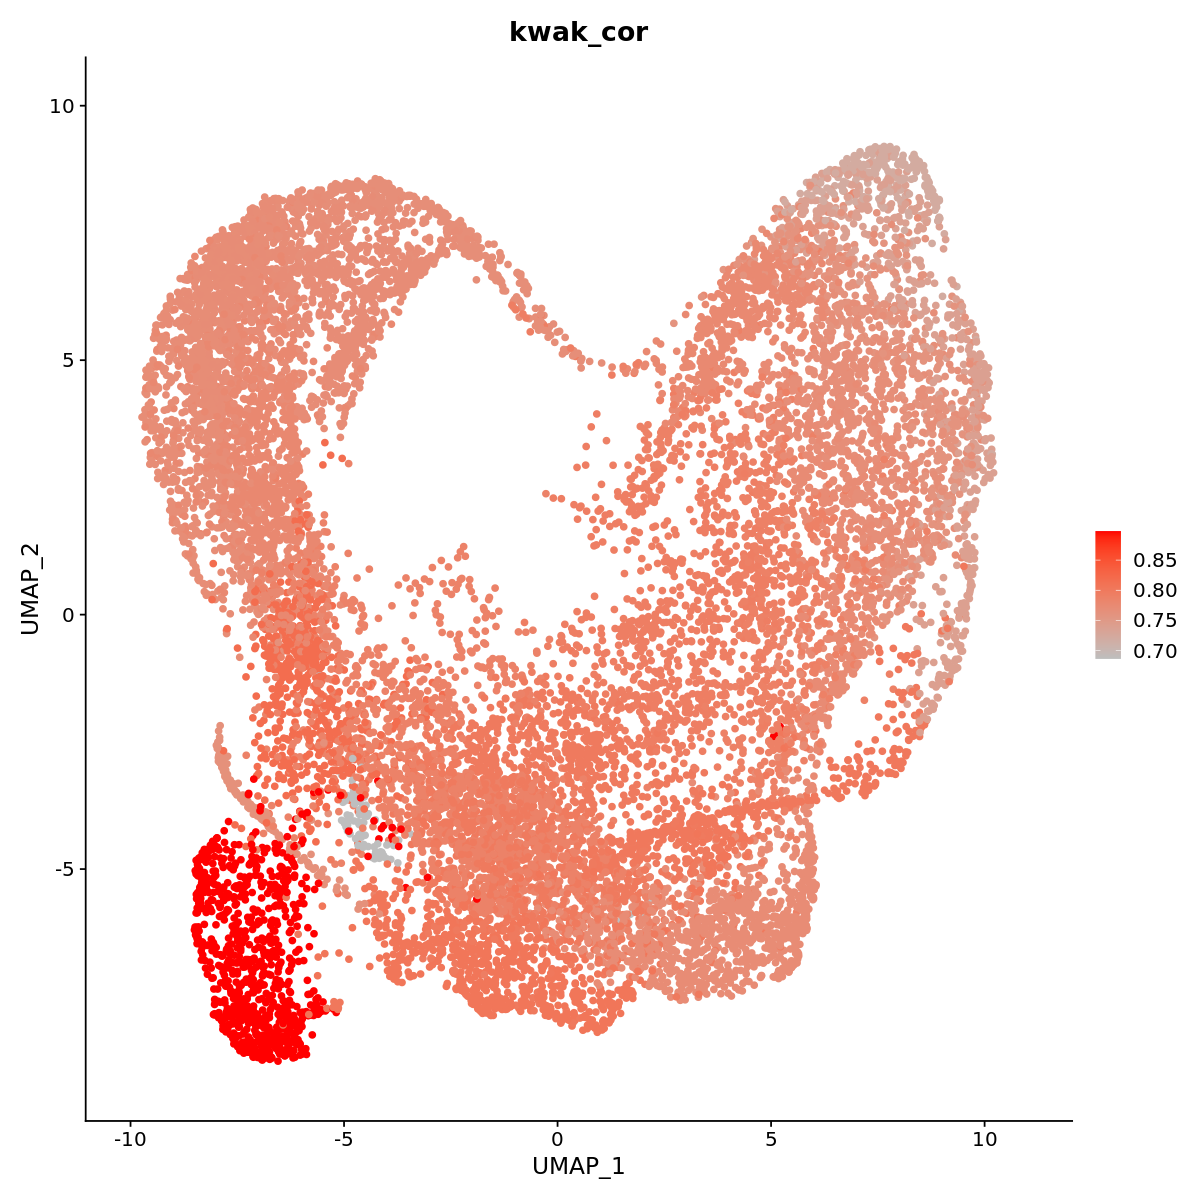

In [21]:
#set dataset
dataset = kwak_ptpms
#dataset = carpels
#dataset = fils
#dataset = seps
#dataset = pets

cors_spearman = vector()
count = 1

seu_intd_wt@meta.data$kwak_cor = NULL

for (cluster in c(1:length(levels(seu_intd_wt@meta.data$seurat_clusters)))){
    test = cbind(pbs[[cluster]][intersect(rownames(pbs[[cluster]]), rownames(dataset)),],dataset[intersect(rownames(pbs[[cluster]]), rownames(dataset)),])
#     print(cluster)
#     print(cor(log(test[,1]+.1), log(test[,2]+.1), method = "spearman"))
    cors_spearman[count] = cor(log(test[,1]+.1), log(test[,2]+.1), method = "spearman")
    count = count + 1
}

for (i in c(1:length(levels(seu_intd_wt@meta.data$seurat_clusters)))){
    seu_intd_wt@meta.data$kwak_cor[seu_intd_wt@meta.data$seurat_clusters == toString(i-1)] = cors_spearman[i]
}

plot = FeaturePlot(seu_intd_wt,  features = "kwak_cor", pt.size = 1.5, cols = c("gray", "red"))
#png("kwak_cor_wt_2_1_22.png")
print(plot)   
ggsave(file=paste0("/home/robotmessenger810/sc_analysis/data/for_figures/UMAPs/kwak_cor_wt_2_1_22.png"), plot=plot, width=10, height=10)
#dev.off() 

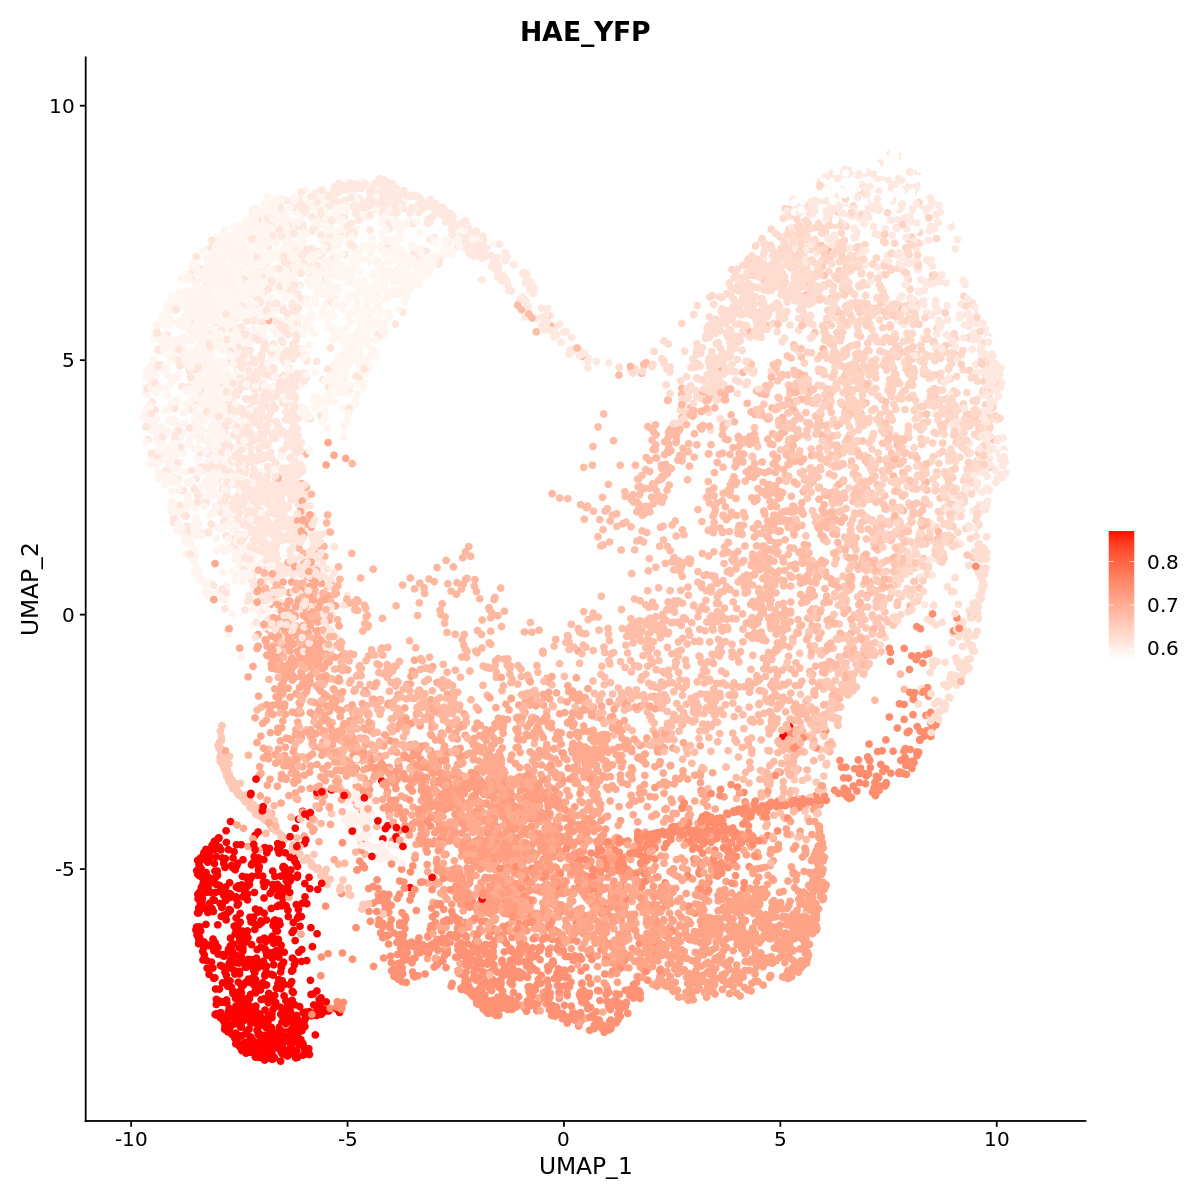

In [22]:
#set dataset
dataset = YFP_av
#dataset = carpels
#dataset = fils
#dataset = seps
#dataset = pets

cors_spearman = vector()
count = 1

seu_intd_wt@meta.data$HAE_YFP = NULL

for (cluster in c(1:length(levels(seu_intd_wt@meta.data$seurat_clusters)))){
    test = cbind(pbs[[cluster]][intersect(rownames(pbs[[cluster]]), rownames(dataset)),],dataset[intersect(rownames(pbs[[cluster]]), rownames(dataset)),])
#     print(cluster)
#     print(cor(log(test[,1]+.1), log(test[,2]+.1), method = "spearman"))
    cors_spearman[count] = cor(log(test[,1]+.1), log(test[,2]+.1), method = "spearman")
    count = count + 1
}

for (i in c(1:length(levels(seu_intd_wt@meta.data$seurat_clusters)))){
    seu_intd_wt@meta.data$HAE_YFP[seu_intd_wt@meta.data$seurat_clusters == toString(i-1)] = cors_spearman[i]
}

plot = FeaturePlot(seu_intd_wt,  features = "HAE_YFP", pt.size = 1.5, cols = c("white", "red"))
#png("HAE_YFP_cor_wt_2_1_22.png")
print(plot)   
ggsave(file=paste0("/home/robotmessenger810/sc_analysis/data/for_figures/UMAPs/HAE_YFP_cor_wt_2_1_22.png"), plot=plot, width=10, height=10)

#dev.off() 